# Activity 2 - Hello, Security Analytics

For this “Hello World” example, you are working on a problem given to you by the manager of the Security Operations Center (SOC). It seems the SOC analysts are becoming inundated with “trivial” alerts ever since a new data set of indicators was introduced into the Security Information and Event Management (SIEM) system. They have asked for your help in reducing the number of “trivial” alerts with- out sacrificing visibility.

This is a good problem to tackle through data analysis, and we should be able to form a solid, practical question to ask after we perform some exploratory data analysis and hopefully arrive at an answer that helps out the SOC.

## Loading in Data

In [6]:
import pandas as pd
import sys
# read in the data into a pandas data frame
avRep = "./data/reputation.data"
av = pd.read_csv(avRep, sep="#", header=None)

# make smarter column names
av.columns = ["IP","Reliability","Risk","Type","Country",
              "Locale","Coords","x"]
print (av)

                     IP  Reliability  Risk           Type Country  Locale  \
0        222.76.212.189            4     2  Scanning Host      CN  Xiamen   
1        222.76.212.185            4     2  Scanning Host      CN  Xiamen   
2        222.76.212.186            4     2  Scanning Host      CN  Xiamen   
3           5.34.246.67            6     3       Spamming      US     NaN   
4         178.94.97.176            4     5  Scanning Host      UA  Merefa   
...                 ...          ...   ...            ...     ...     ...   
258621  179.244.194.219            4     2       Spamming      BR     NaN   
258622   216.99.159.166            4     2  Scanning Host      US  Walnut   
258623   216.99.159.169            3     2  Scanning Host      US  Walnut   
258624   216.99.159.176            3     2  Scanning Host      US  Walnut   
258625   216.99.159.117            3     3  Scanning Host      US  Walnut   

                              Coords   x  
0         24.4797992706,118.0819

In [8]:
av.head().to_csv(sys.stdout)

,IP,Reliability,Risk,Type,Country,Locale,Coords,x
0,222.76.212.189,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
1,222.76.212.185,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
2,222.76.212.186,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
3,5.34.246.67,6,3,Spamming,US,,"38.0,-97.0",12
4,178.94.97.176,4,5,Scanning Host,UA,Merefa,"49.8230018616,36.0507011414",11


In [10]:
from IPython.display import HTML 
# display the first 10 lines of the dataframe as formatted HTML
HTML(av.head(10).to_html())

### This is actually deprecated - we can instead just say 'av' to see this output

,IP,Reliability,Risk,Type,Country,Locale,Coords,x
0,222.76.212.189,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
1,222.76.212.185,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
2,222.76.212.186,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
3,5.34.246.67,6,3,Spamming,US,NaN,"38.0,-97.0",12
4,178.94.97.176,4,5,Scanning Host,UA,Merefa,"49.8230018616,36.0507011414",11
5,66.2.49.232,4,2,Scanning Host,US,Union City,"37.5962982178,-122.065696716",11
6,222.76.212.173,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
7,222.76.212.172,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
8,222.76.212.171,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
9,174.142.46.19,6,3,Spamming,NaN,NaN,"24.4797992706,118.08190155",12


In [12]:
av

,IP,Reliability,Risk,Type,Country,Locale,Coords,x
0,222.76.212.189,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
1,222.76.212.185,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
2,222.76.212.186,4,2,Scanning Host,CN,Xiamen,"24.4797992706,118.08190155",11
3,5.34.246.67,6,3,Spamming,US,NaN,"38.0,-97.0",12
4,178.94.97.176,4,5,Scanning Host,UA,Merefa,"49.8230018616,36.0507011414",11
...,...,...,...,...,...,...,...,...
258621,179.244.194.219,4,2,Spamming,BR,NaN,"-10.0,-55.0",12
258622,216.99.159.166,4,2,Scanning Host,US,Walnut,"34.0115013123,-117.853500366",11
258623,216.99.159.169,3,2,Scanning Host,US,Walnut,"34.0115013123,-117.853500366",11
258624,216.99.159.176,3,2,Scanning Host,US,Walnut,"34.0115013123,-117.853500366",11


Above we have looked at how you can load in a dataset, and then how you can print this in the notebook - either using **print()**, or the **HTML** function, or simply by giving the variable as the last command in the cell.

Before going any deeper lets just look at the data so that we know what we are working with:

- Reliability, Risk, and x are integers.

- IP, Type, Country, Locale, and Coords are character strings.

- The IP address is stored in the dotted-quad notation, not in hostnames or decimal format.

- Each record is associated with a unique IP address, so there are 258,626 IP addresses (in this download).

- Each IP address has been geo-located into the latitude and longitude pair in the Coords field, but they are in a single field separated by a comma. You will have to parse that further if you want to use that field.

Descriptive Statistics
---

What do we mean by descriptive statistics? As the name suggests, these essential describe the properties of our data. They help for summarisation, and for providing easier forms of comparison when consider two groups of data. You will likely be familiar with some of these concepts, but nevertheless, it is important to think further about how they can be used to summarise a data set (and also, if there are any potential issues are with using them and how we can overcome these?)

Commonly used descriptive statistics include:

- Minimum and maximum values; taking the difference of these will give you the range (range = max - min)
- Median (the value at the middle of the dataset)
- First and third quartiles (the 25th and 75th percentiles, or you could think of it as the median value of the first and last halves of the data, respectively)
- Mean (sum of all  values divided by the number of count)

Whilst we can calculate these "in code", or use in-built functions such as **np.mean()**, Pandas provides a convenient **describe()** function that will perform all of these together.

In [14]:
av['Reliability'].describe()

count    258626.000000
mean          2.798040
std           1.130419
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          10.000000
Name: Reliability, dtype: float64

In [16]:
av['Risk'].describe()

count    258626.000000
mean          2.221362
std           0.531571
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Risk, dtype: float64

Above, note how we can select the specific column using **av['Reliability']** or **av['Risk']**.

An important note to make (from the Alienvault documentation) is that Risk and Reliability are scored 1-10, however these are ordinal values rather than numerical.

What does this mean? Essentially, ordinal values denote order, however they are not quantities. Therefore, a score of 4 is not specifically twice the risk of 2, however it is greater.

In [18]:
def factor_col(col):
    factor = pd.Categorical(col)
    return pd.value_counts(factor,sort=False)

rel_ct = pd.value_counts(av['Reliability'])
risk_ct = pd.value_counts(av['Risk'])
type_ct = pd.value_counts(av['Type'])
country_ct = pd.value_counts(av['Country'])

print (factor_col(av['Reliability']))

print (factor_col(av['Risk']))

print (factor_col(av['Type']).head(n=10))

print (factor_col(av['Country']).head(n=10))

1       5612
2     149117
3      10892
4      87040
5          7
6       4758
7        297
8         21
9        686
10       196
Name: count, dtype: int64
1        39
2    213852
3     33719
4      9588
5      1328
6        90
7        10
Name: count, dtype: int64
APT;Malware Domain                  1
C&C                               610
C&C;Malware Domain                 31
C&C;Malware IP                     20
C&C;Scanning Host                   7
Malicious Host                   3770
Malicious Host;Malware Domain       4
Malicious Host;Malware IP           2
Malicious Host;Scanning Host      163
Malware Domain                   9274
Name: count, dtype: int64
A1     267
A2       2
AE    1827
AL       4
AM       6
AN       3
AO     256
AR    3046
AT      51
AU     155
Name: count, dtype: int64


/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_8497/299613582.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  rel_ct = pd.value_counts(av['Reliability'])
/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_8497/299613582.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  risk_ct = pd.value_counts(av['Risk'])
/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_8497/299613582.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  type_ct = pd.value_counts(av['Type'])
/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_8497/299613582.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  country_ct = pd.valu

Above, we define our own function called **factor_col()** that will essentially identify all possible values within a given dataset, and count the number of occurrence for each. A similar function Pandas can called using **group_by**.

## Ploting our data

/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_8497/275371295.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  country_ct = pd.value_counts(av['Country'])


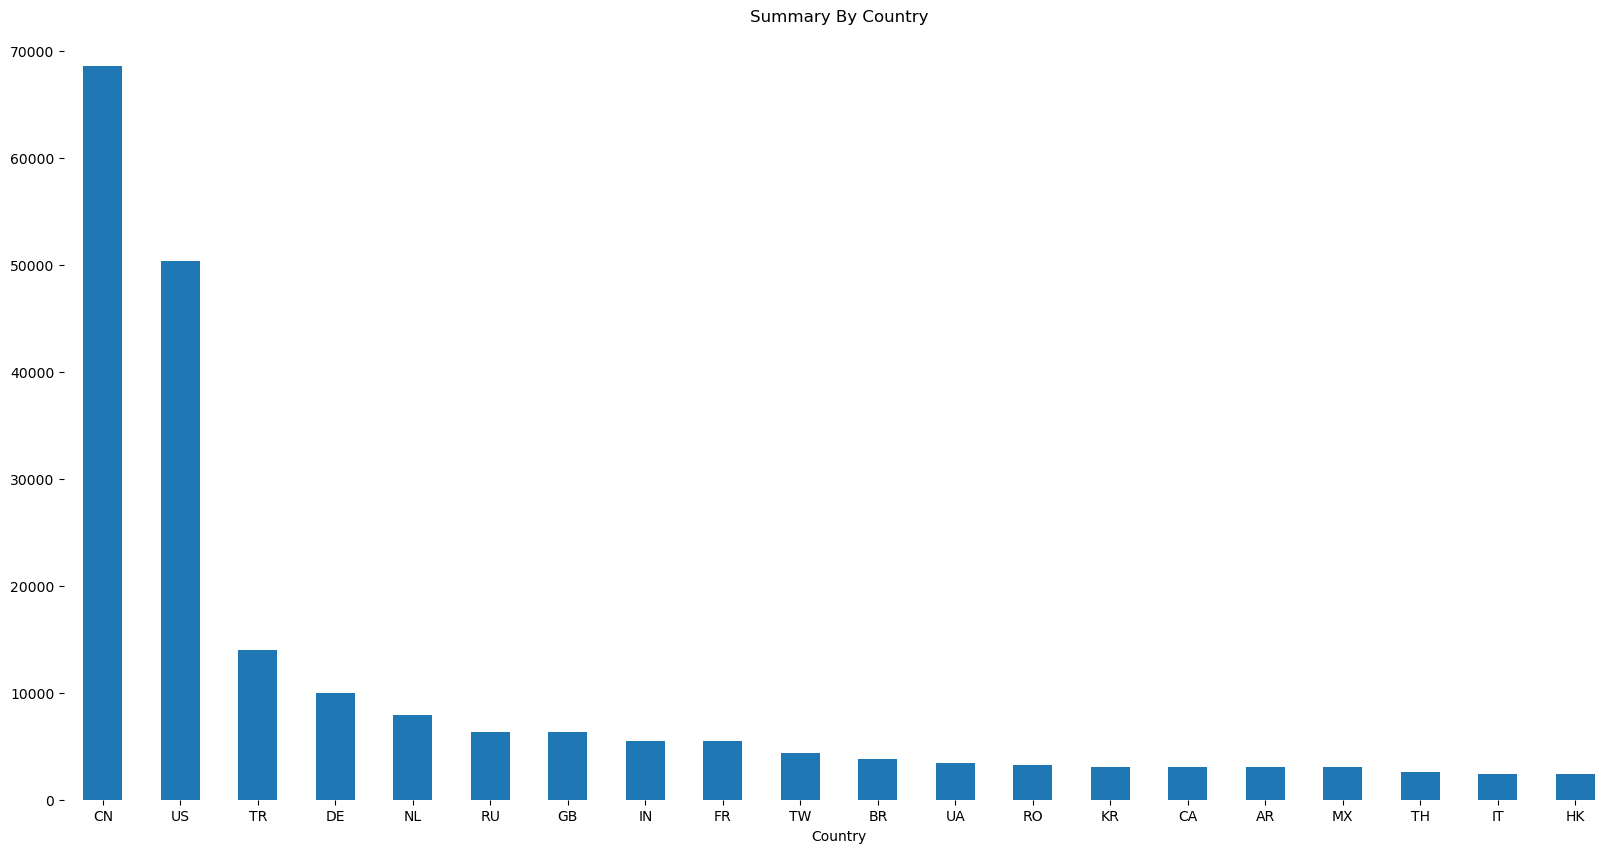

In [20]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# sort by country
country_ct = pd.value_counts(av['Country'])

# plot the data
plt.axes(frameon=0) # reduce chart junk
country_ct[:20].plot(kind='bar', 
   rot=0, title="Summary By Country", figsize=(20,10)).grid(False)
plt.show()

/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_8497/299613582.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  return pd.value_counts(factor,sort=False)


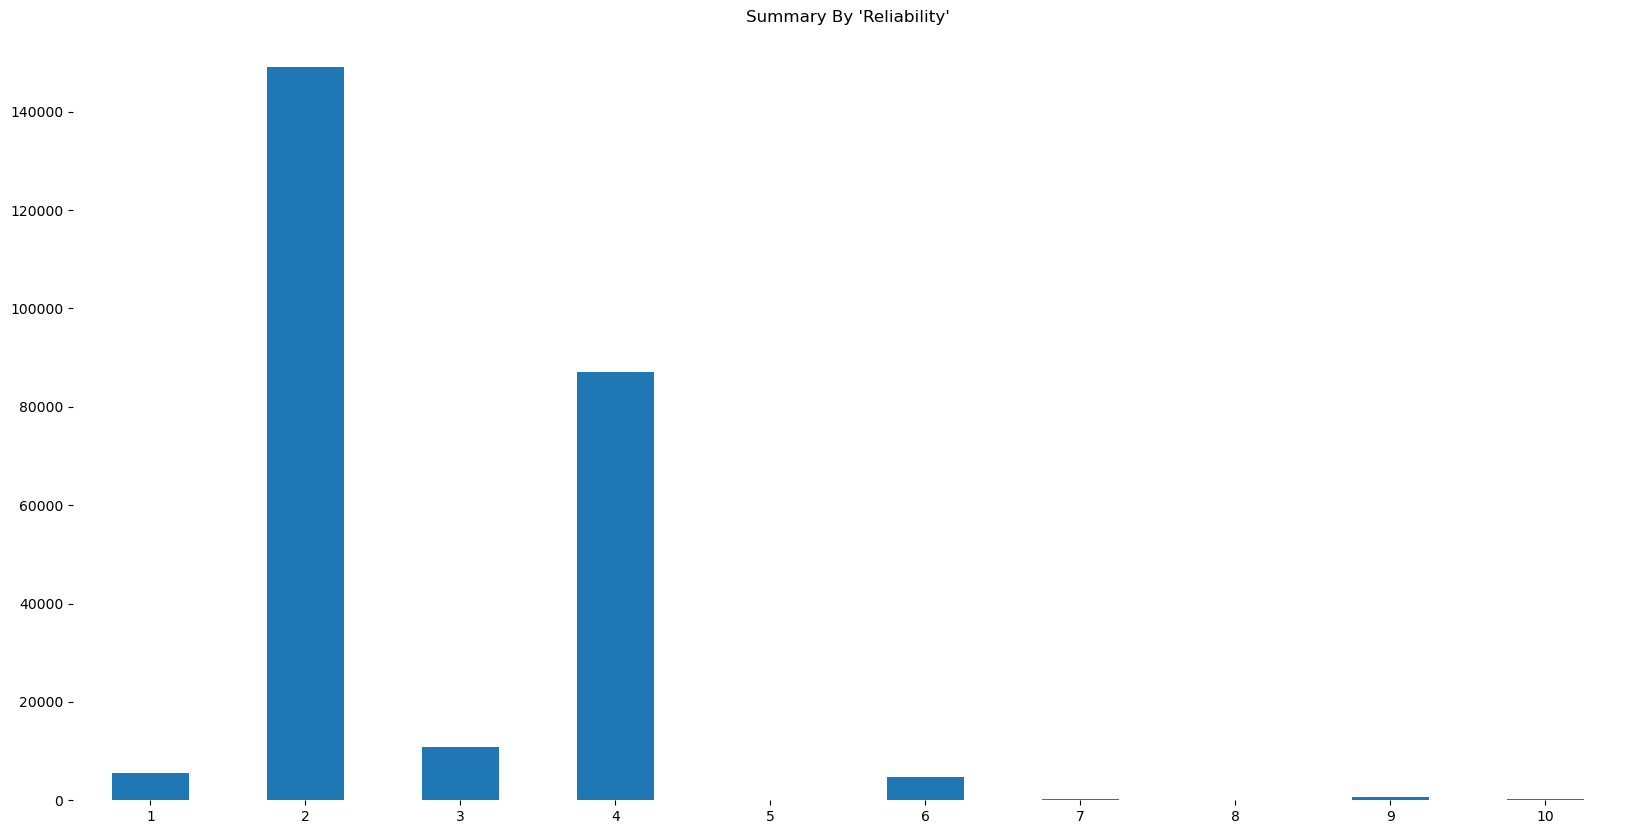

In [21]:
plt.axes(frameon=0) # reduce chart junk
factor_col(av['Reliability']).plot(kind='bar', rot=0,
           title="Summary By 'Reliability'", figsize=(20,10)).grid(False)
plt.show()

/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_8497/299613582.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  return pd.value_counts(factor,sort=False)


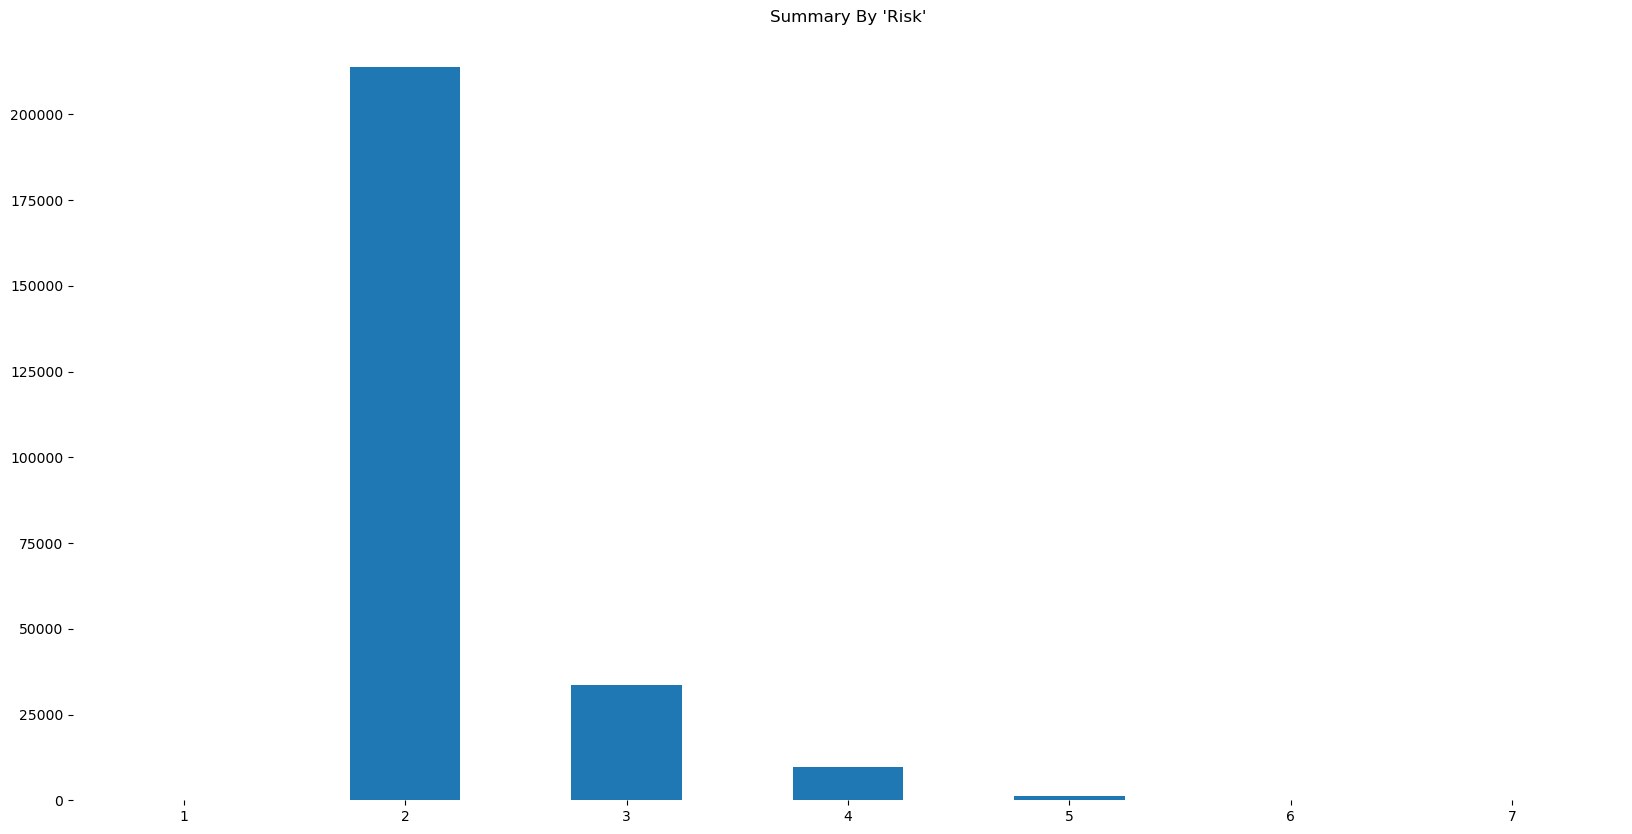

In [24]:
plt.axes(frameon=0) # reduce chart junk
factor_col(av['Risk']).plot(kind='bar', rot=0, 
           title="Summary By 'Risk'", figsize=(20,10)).grid(False)
plt.show()

Above, we have created bar plots that show the values for each attribute, allowing us to examine these in greater detail.

In [26]:
top10 = pd.value_counts(av['Country'])[0:9] 
# calculate the % for each of the top 10
top10.astype(float) / len(av['Country'])

/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_8497/1424850040.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  top10 = pd.value_counts(av['Country'])[0:9]


Country
CN    0.265182
US    0.194826
TR    0.053970
DE    0.038484
NL    0.030666
RU    0.024537
GB    0.024332
IN    0.021189
FR    0.021069
Name: count, dtype: float64

Note that above, we have divided through by the **length** of the Country column, essentially giving a percentage of countries rather than absolute counts.

## Further Exploration

Perhaps we want to look at both risk and reliability together? We can use a crosstab to achieve this.

In [28]:
from matplotlib import cm
from numpy import arange

print(pd.crosstab(av['Risk'], av['Reliability']).to_string())

Reliability    1       2     3      4   5     6    7   8    9   10
Risk                                                              
1               0       0    16      7   0     8    8   0    0   0
2             804  149114  3670  57653   4  2084   85  11  345  82
3            2225       3  6668  22168   2  2151  156   7  260  79
4            2129       0   481   6447   0   404   43   2   58  24
5             432       0    55    700   1   103    5   1   20  11
6              19       0     2     60   0     8    0   0    1   0
7               3       0     0      5   0     0    0   0    2   0


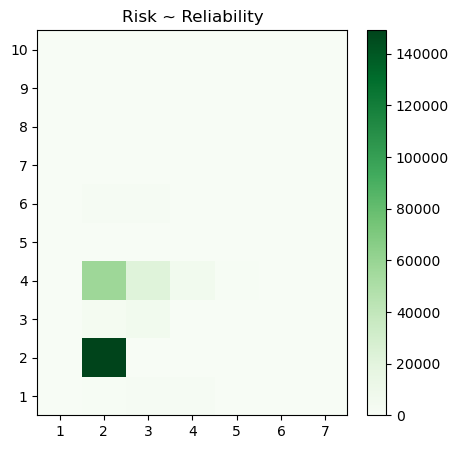

In [30]:
# graphical view of contingency table (swapping risk/reliability)
xtab = pd.crosstab(av['Reliability'], av['Risk'])
fig = plt.figure(figsize=(5,5))
plt.pcolormesh(xtab,cmap=cm.Greens, figure=fig)
plt.yticks(arange(0.5,len(xtab.index), 1),xtab.index)
plt.xticks(arange(0.5,len(xtab.columns), 1),xtab.columns)
plt.colorbar()
plt.title("Risk ~ Reliability")
plt.show()

Ok, so this starts to highlight some interesting details about risk and reliability however it is lacking in context - can we identify risk/reliability against each type of alert as observed in the SOC? Let's try below.

In [32]:
# Listing 3-23
# require object: av (3-5)
# See corresponding output in Figure 3-9
# compute contingency table for Risk/Reliability factors which 
# produces a matrix of counts of rows that have attributes at

# create new column as a copy of Type column
av['newtype'] = av['Type']

# replace multi-Type entries with “Multiples”
av[av['newtype'].str.contains(";")] = "Multiples"

# setup new crosstab structures
typ = av['newtype']
rel = av['Reliability']
rsk = av['Risk']

# compute crosstab making it split on the
# new “type” column
xtab = pd.crosstab(typ, [ rel, rsk ], rownames=['typ'], colnames=['rel', 'rsk'])



# the following print statement will show a huge text
# representation of the contingency table. The output
# is too large for the book, but is worth looking at 
# as you run through the exercise to see how useful 
# visualizations can be over raw text/numeric output

print (xtab.to_string())


rel                     1                               2      3                          4                                  5        6                        7                  8             9                     10            Multiples
rsk                     2     3     4    5   6  7       2  3   1     2     3    4   5  6  1      2      3     4    5   6  7  2  3  5  1    2    3    4   5  6  1   2    3   4  5  2  3  4  5    2    3   4   5  6  7   2   3   4  5 Multiples
typ                                                                                                                                                                                                                                          
C&C                     0     0     1    2   1  0       0  0   0     0     0  313  22  2  0      0      0    15   22   4  1  0  0  1  0    0    0   98  60  5  0   0    0   7  3  0  0  1  1    0    0  19  16  1  1   0   1   8  5         0
Malicious Host          0     6    51   41   8  

/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_8497/3000437735.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Multiples' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  av[av['newtype'].str.contains(";")] = "Multiples"
/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_8497/3000437735.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Multiples' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  av[av['newtype'].str.contains(";")] = "Multiples"


This data is difficult to observe in tabular form - as discussed, there is simply too much and it is nested which also makes it challenging to follow. 

Instead, let's consider a bar chart.

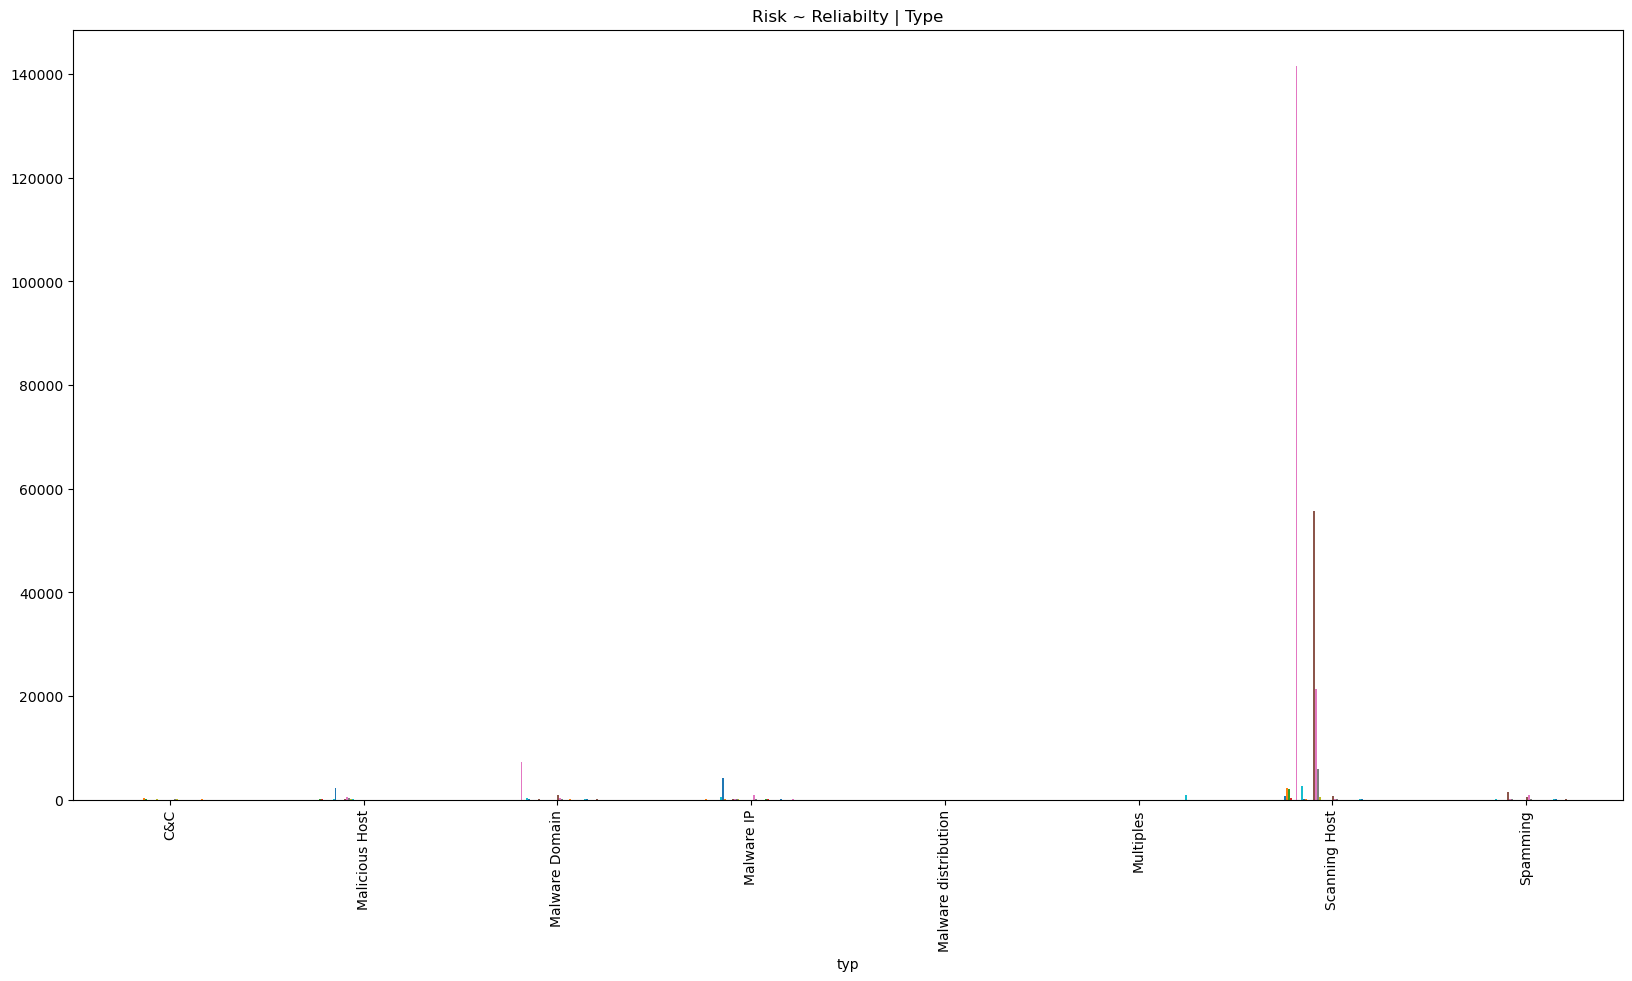

In [34]:
xtab.plot(kind='bar',legend=False, title="Risk ~ Reliabilty | Type", figsize=(20,10)).grid(False)
plt.show()

Excellent! We have a bar chart that shows the combined risk/reliability measures against each type of SOC alert. This starts to look useful. However, perhaps we want to exclude Scanning Host - we expect this behaviour on our network and showing this is making it harder to observe other details about the data. Let's exclude this next.

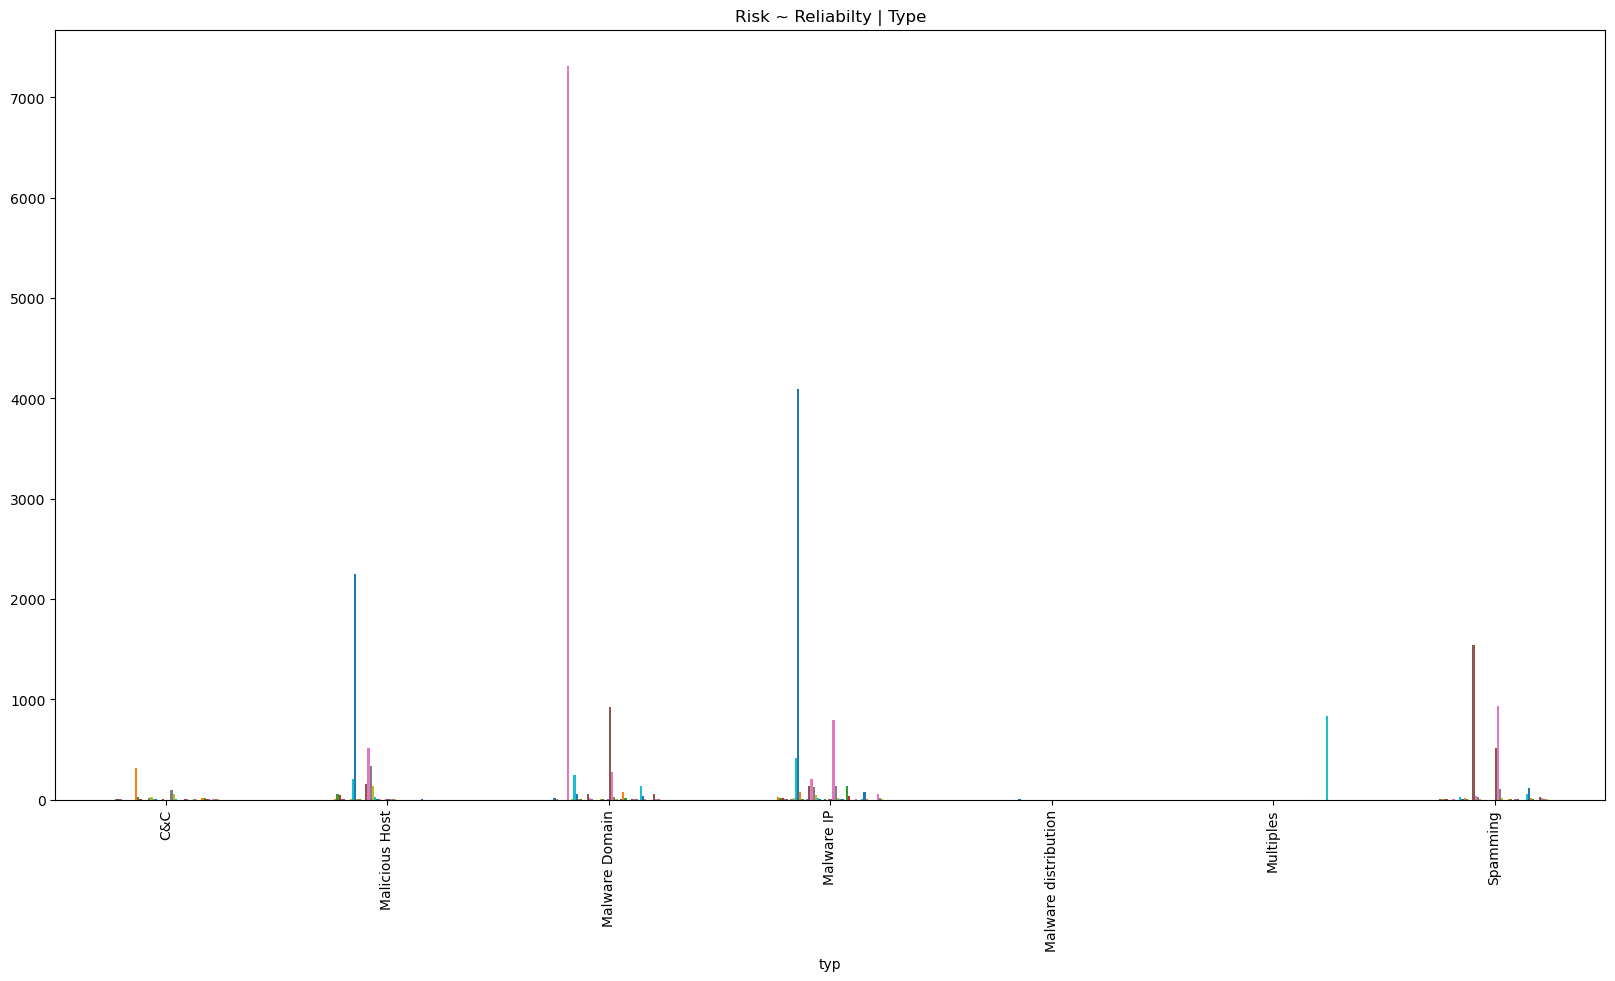

In [36]:
# Here we remove Scanning Host
rrt_df = av[av['newtype'] != "Scanning Host"]

# And then we do the chart again
typ = rrt_df['newtype']
rel = rrt_df['Reliability']
rsk = rrt_df['Risk']
xtab = pd.crosstab(typ, [ rel, rsk ], 
       rownames=['typ'], colnames=['rel', 'rsk'])
xtab.plot(kind='bar',legend=False, 
   title="Risk ~ Reliabilty | Type", figsize=(20,10)).grid(False)
plt.show()


Ok this looks more interesting now. We see Malware Domain and Malware distribution cropping up, which would make sense - however we may not necessarily be interested in these for this particular story. Let's exclude these and see what we are left with.

Count: 15171; Percent: 5.9%


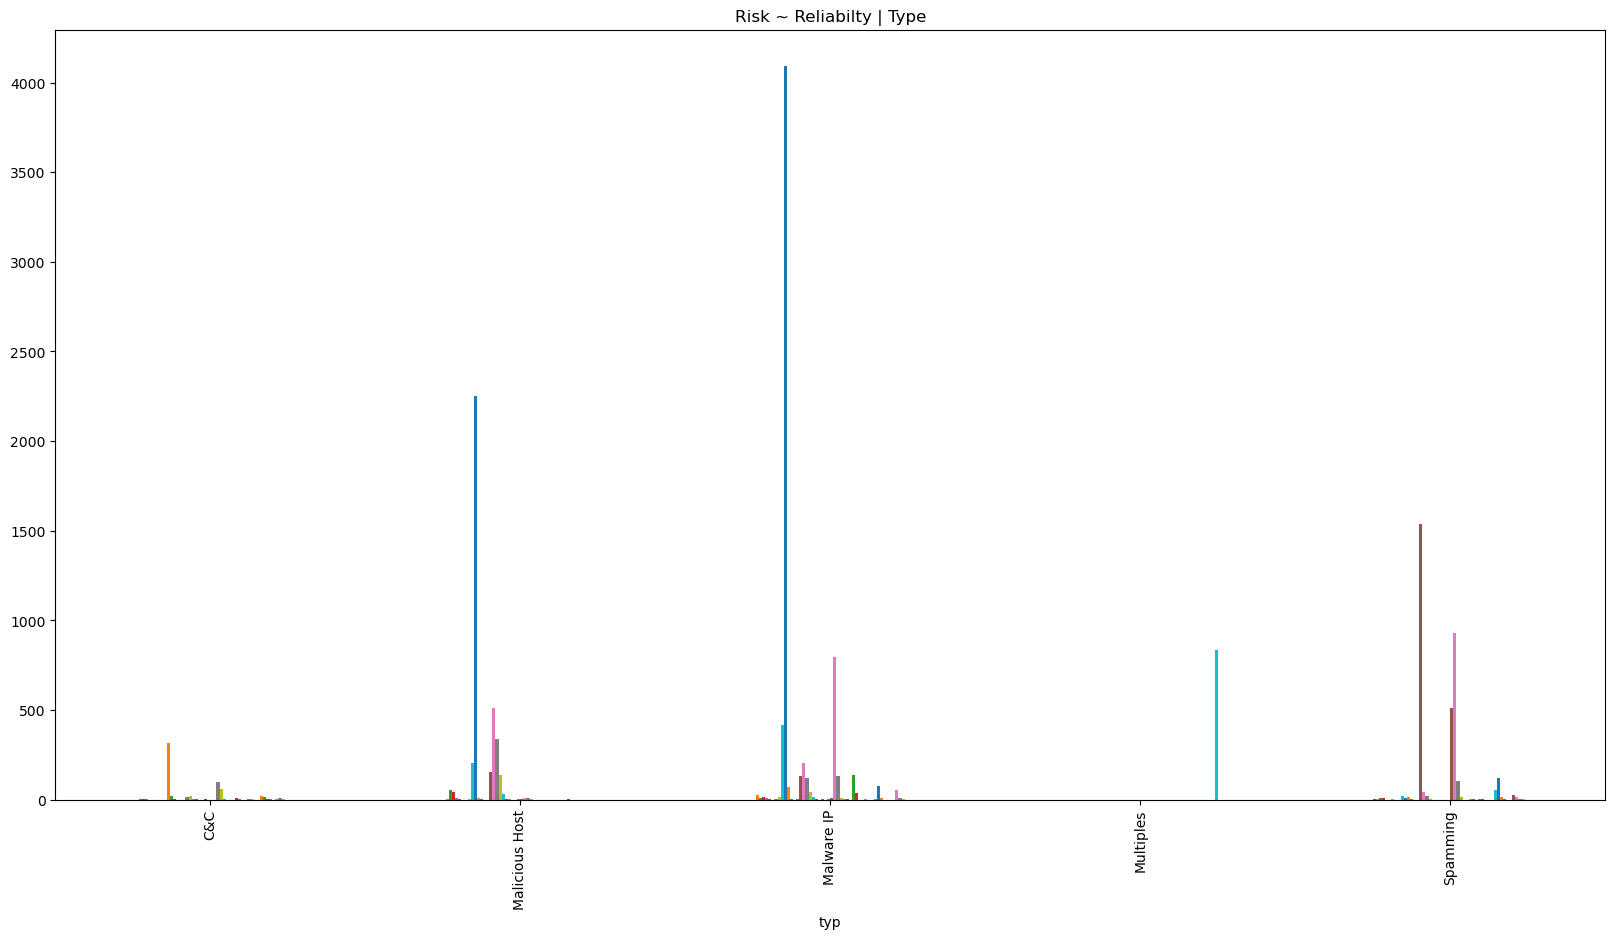

rel             1                     2      3       ...    9                \
rsk             2   3   4   5   6  7  2  3   1    2  ...    3   4   5  6  7   
typ                                                  ...                      
C&C             0   0   1   2   1  0  0  0   0    0  ...    0  19  16  1  1   
Malicious Host  0   6  51  41   8  1  0  0   1  206  ...    2   0   0  0  0   
Malware IP      0  23  11  15  10  2  0  3  12  415  ...   74  10   0  0  0   
Multiples       0   0   0   0   0  0  0  0   0    0  ...    0   0   0  0  0   
Spamming        1   2   9   7   0  0  1  0   0   22  ...  120  15   3  0  0   

rel             10            Multiples  
rsk              2   3   4  5 Multiples  
typ                                      
C&C              0   1   8  5         0  
Malicious Host   0   0   0  0         0  
Malware IP       0  53  11  2         0  
Multiples        0   0   0  0       834  
Spamming        24  17   3  4         0  

[5 rows x 50 columns]

In [38]:
rrt_df = rrt_df[rrt_df['newtype'] != "Malware distribution" ]
rrt_df = rrt_df[rrt_df['newtype'] != "Malware Domain" ]
typ = rrt_df['newtype']
rel = rrt_df['Reliability']
rsk = rrt_df['Risk']
xtab = pd.crosstab(typ, [ rel, rsk ],
        rownames=['typ'], colnames=['rel', 'rsk'])

print ("Count: %d; Percent: %2.1f%%" % (len(rrt_df), (float(len(rrt_df))
   / len(av)) * 100))
## Count: 15171; Percent: 5.9%

xtab.plot(kind='bar',legend=False, title="Risk ~ Reliabilty | Type", figsize=(20,10)).grid(False)

plt.show()

xtab

We have now managed to filter our data down to reveal aspects about malware IP, malicious hosts, as well as command and control servers, spamming addresses, and multiples (which would require a separate investigation). Importantly, we can gain more insight into these now, and we have worked logically through to filter unnecessary information for our story - we now want to learn more about the malware IPs since there are a great number of these. Also worth noting, we are now working with 5.9% of our original data (15171 rows) making it much more manageable to explore and find relavent details, rather than being inudated with irrelavent information. Our SOC team were struggling with the number of alerts they were dealing with - this workflow would allow them to manage the alerts much more effectively, and concentrate on the key details of interest.

Having developed this in a Notebook for the purpose of exploration, we could easier export this as a Python script that would run periodically to filter our alerts as needed.

This example should help to demonstrate the benefit of interactive analysis of the data, and how this can be used to rapidly design a suitable analysis workflow for deployment.